In [70]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 

# TODO: may have to add '..' if move from root folder
home = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
pths = [os.path.join(home, 'astrobot')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

from astrobot.util import *

import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint as pp 
# import pandas as pd 

# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')
# pd.read_clipboard()

# For experiments
# path to astrobot roo
ROOT_DIR

# path to this package from experiments folder
PACKAGE_FPATH_FOR_EXPERIMENTS

# path to epw from experiments folder
EPW_FPATH_FOR_EXPERIMENTS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'c:\\Users\\saera\\master\\resources\\epw\\philadelphia\\philadelphia.epw'

[[  25.  200.]
 [ 200. 2500.]]


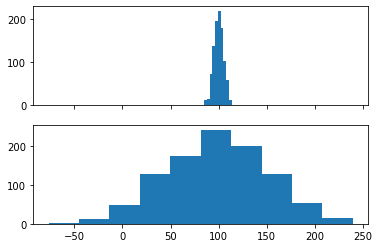

In [83]:
mu = [100, 100]  
std = [5, 50]
corr = 0.8

covs = np.array(
    [[std[0]**2          , std[0]*std[1]*corr], 
     [std[0]*std[1]*corr,           std[1]**2]])

print(covs)
m = np.random.multivariate_normal(mu, covs, 1000).T

f, a = plt.subplots(2, sharex=True)
_ = a[0].hist(m[0])
_ = a[1].hist(m[1])


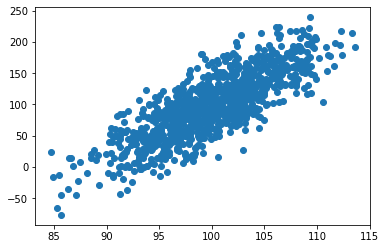

In [84]:

plt.scatter(m[0], m[1])


In [85]:
def cov(X, Y):
    return np.mean((X - X.mean()) * (Y - Y.mean()))
def cor(X, Y):
    return cov(X, Y) / (np.std(X) * np.std(Y))

def mtx(m, fx):
    return np.array(
        [[fx(m[0], m[0]), fx(m[0], m[1])],  
         [fx(m[1], m[0]), fx(m[1], m[1])]]
        ).round(2)

# [[ 625. 1000.]
#  [1000. 2500.]]

print('Sqrt of Covariance (co-std):')
print(np.sqrt(mtx(m, cov)))
print('\nCorrelation:')   
print(mtx(m, cor))




Sqrt of Covariance (co-std):
[[ 5.09215082 14.72209224]
 [14.72209224 52.22346216]]

Correlation:
[[1.   0.82]
 [0.82 1.  ]]


In [80]:
"""
Std ~ 5, 50

Sqrt of Covariance (co-std):
[[ 4.87442304 13.60147051]
 [13.60147051 48.51515227]]

Correlation:
[[1.   0.78]
 [0.78 1.  ]]


Std ~ 50, 50
Sqrt of Covariance (co-std):
[[51.48465791 45.36309072]
 [45.36309072 50.02349448]]

Correlation:
[[1.  0.8]
 [0.8 1. ]]
"""


'\nStd = 5, 50\n\nSqrt of Covariance (co-std):\n[[ 4.87442304 13.60147051]\n [13.60147051 48.51515227]]\n\nCorrelation:\n[[1.   0.78]\n [0.78 1.  ]]\n'